## Observations and Insights

Capomulin has the most data points and seems to be the most promising of the four mentioned drug treatments. 

There was about an equal distribution of male and female mice. 

As the weight of the mouse goes up, the size of the tumor goes up. 

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset

mouse_study = pd.merge(study_results, mouse_metadata, how="right", on=["Mouse ID", "Mouse ID"] )
mouse_study

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


## Summary statistics

In [2]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

#get summary stats for the whole dataset
tumor_volume = mouse_study["Tumor Volume (mm3)"]
drug_regimen = mouse_study["Drug Regimen"]
mean_tumor = np.mean(tumor_volume)
median_tumor = np.median(tumor_volume)
tumor_variance = np.var(tumor_volume,ddof = 0)
tumor_sd = np.std(tumor_volume,ddof = 0)

print(f"The mean tumor_volume is {mean_tumor} across all drug regimens")
print(f"The median tumor_volume is {median_tumor} across all drug regimens")
print(f"The tumor_volume variance is {tumor_variance} across all drug regimens")
print(f"The tumor_volume standard deviation is {tumor_sd} across all drug regimens")

# summary stat breakdown by Drug Regimen
mice = mouse_study.groupby(["Drug Regimen"])
mean_mouse = mice.mean()
mean_mouse = mean_mouse.drop(["Timepoint", "Metastatic Sites", "Age_months", "Weight (g)"], axis=1)
mean_mouse = mean_mouse.rename(columns={"Tumor Volume (mm3)": "Tumor Volume mean"})
median_mouse = mice.median()
median_mouse = median_mouse.drop(["Timepoint", "Metastatic Sites", "Age_months", "Weight (g)"], axis=1)
median_mouse = median_mouse.rename(columns={"Tumor Volume (mm3)": "Tumor Volume median"})
var_mouse = mice.var()
var_mouse = var_mouse.drop(["Timepoint", "Metastatic Sites", "Age_months", "Weight (g)"], axis=1)
var_mouse = var_mouse.rename(columns={"Tumor Volume (mm3)": "Tumor Volume variance"})
std_mouse = mice.std()
std_mouse = std_mouse.drop(["Timepoint", "Metastatic Sites", "Age_months", "Weight (g)"], axis=1)
std_mouse = std_mouse.rename(columns={"Tumor Volume (mm3)": "Tumor Volume std"})
sem_mouse = mice.sem()
sem_mouse = sem_mouse.drop(["Timepoint", "Metastatic Sites", "Age_months", "Weight (g)", "Mouse ID", "Sex"], axis=1)
sem_mouse = sem_mouse.rename(columns={"Tumor Volume (mm3)": "Tumor Volume sem"})


# Merge summary stat breakdowns into on dataframe
mouse_mean_median = pd.merge(mean_mouse, median_mouse, how="right", on=["Drug Regimen"])
mouse_var_std = pd.merge(var_mouse, std_mouse, how="right", on=["Drug Regimen"])
mouse_sem_df = pd.merge(mouse_var_std, sem_mouse, how="right", on=["Drug Regimen"])
mouse_df = pd.merge(mouse_mean_median, mouse_sem_df, how="right", on=["Drug Regimen"])
mouse_df



The mean tumor_volume is 50.44838063133656 across all drug regimens
The median tumor_volume is 48.95147442 across all drug regimens
The tumor_volume variance is 79.07427999025764 across all drug regimens
The tumor_volume standard deviation is 8.8923720114634 across all drug regimens


,Tumor Volume mean,Tumor Volume median,Tumor Volume variance,Tumor Volume std,Tumor Volume sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

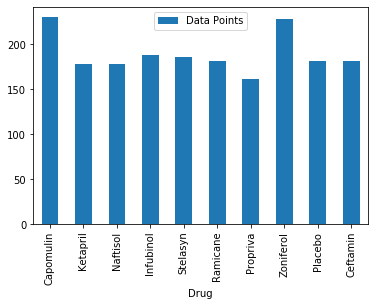

In [3]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

tumor_df = mouse_study[["Tumor Volume (mm3)", "Drug Regimen"]].groupby("Drug Regimen")

drug_count = tumor_df["Drug Regimen"].count()
drug_name = drug_regimen.unique()

count_chart = pd.DataFrame({"Drug" : drug_name, "Data Points": drug_count})
chart = count_chart.plot.bar(x = "Drug", y="Data Points")


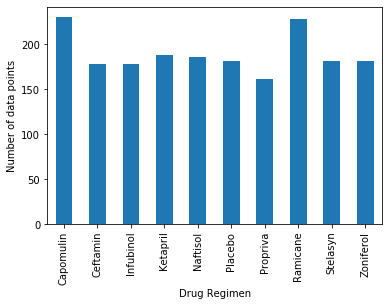

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

tumor_df = mouse_study[["Tumor Volume (mm3)", "Drug Regimen"]].groupby("Drug Regimen")

drug_count = tumor_df["Drug Regimen"].count()

count_chart = drug_count.plot(kind='bar')
count_chart.set_xlabel("Drug Regimen")
count_chart.set_ylabel("Number of data points")

plt.show()


## Pie plots

Text(0, 0.5, 'Female vs Male')

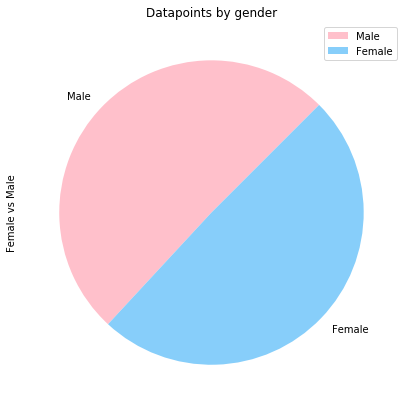

In [5]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

#Split data into groups based on gender.
gender_groups = mouse_study["Sex"].value_counts()

m = [sex for sex in mouse_study["Sex"] if sex == "Male"]
male = len(m)
f = [sex for sex in mouse_study["Sex"] if sex == "Female"]
female = len(f)

labels = ["Female", "Male"]
sizes = [female, male]
colors = ["pink", "lightskyblue"]
explode = (0.5, 0)


gender_pie = gender_groups.plot(kind="pie", y=labels, figsize=(7, 7), colors=colors, startangle=45, title=("Datapoints by gender"), legend=True)
gender_pie.set_ylabel("Female vs Male")

#plt.show()
#plt.tight_layout()
#plt.axis("equal")




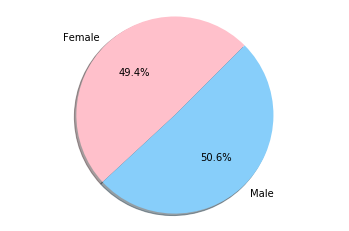

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



plt.pie(sizes, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=45)
plt.axis("equal")
plt.show()



## Quartiles, outliers and boxplots

In [7]:
#  Set the select treatment variable to get summary statistics for the four promising treatments as well as 
#  the stats for the composite data set. 
#
#  all_treatments
#  capomulin
#  ramicane
#  infubinol
#  ceftamin
#

#mouse_tumor = mouse_study.groupby(["Mouse ID"]).max(level="Timepoint")
mouse_tumor = mouse_study.loc[mouse_study["Timepoint"] >= 30]

all_treatments = mouse_tumor.loc[(mouse_tumor["Drug Regimen"] == "Ramicane") | (mouse_tumor["Drug Regimen"] == "Capomulin") |
                          (mouse_tumor["Drug Regimen"] == "Infubinol") | (mouse_tumor["Drug Regimen"] == "Ceftamin") ]

ramicane = mouse_tumor.loc[mouse_tumor["Drug Regimen"] == "Ramicane"]
capomulin = mouse_tumor.loc[mouse_tumor["Drug Regimen"] == "Capomulin"]
infubinol = mouse_tumor.loc[mouse_tumor["Drug Regimen"] == "Infubinol"]
ceftamin = mouse_tumor.loc[mouse_tumor["Drug Regimen"] == "Ceftamin"]

drug_list = [ramicane, capomulin, infubinol, ceftamin]

for x in drug_list:
    
    drug_name = x["Drug Regimen"].unique()
    treatments_df = x["Tumor Volume (mm3)"]
    
  
    quartiles = treatments_df.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    print(f"{drug_name}")
    print(f"The lower quartile of tumor volume is: {lowerq} mm3")
    print(f"The upper quartile of tumor volume is: {upperq} mm3")
    print(f"The interquartile range of tumor volume is: {iqr} mm3")
    print(f"The the median of tumor volume is: {quartiles[0.5]} mm3")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} mm3 could be outliers.")
    print(f"Values above {upper_bound} mm3 could be outliers.")
    print('\n')

['Ramicane']
The lower quartile of tumor volume is: 34.6257163125 mm3
The upper quartile of tumor volume is: 39.8918684875 mm3
The interquartile range of tumor volume is: 5.266152174999995 mm3
The the median of tumor volume is: 37.07941522 mm3
Values below 26.72648805000001 mm3 could be outliers.
Values above 47.791096749999994 mm3 could be outliers.


['Capomulin']
The lower quartile of tumor volume is: 33.1342772325 mm3
The upper quartile of tumor volume is: 40.937535745 mm3
The interquartile range of tumor volume is: 7.803258512500001 mm3
The the median of tumor volume is: 38.168821894999994 mm3
Values below 21.429389463749995 mm3 could be outliers.
Values above 52.64242351375 mm3 could be outliers.


['Infubinol']
The lower quartile of tumor volume is: 58.55019721 mm3
The upper quartile of tumor volume is: 63.7501909075 mm3
The interquartile range of tumor volume is: 5.199993697499998 mm3
The the median of tumor volume is: 60.735894130000005 mm3
Values below 50.750206663750006 mm3 

In [8]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

ramicane_tumor = ramicane["Tumor Volume (mm3)"]
capomulin_tumor = capomulin["Tumor Volume (mm3)"]
infubinol_tumor = infubinol["Tumor Volume (mm3)"]
ceftamin_tumor = ceftamin["Tumor Volume (mm3)"]

tumor_data_df = pd.DataFrame({ "Capomulin": capomulin_tumor,
                              "Ramicane": ramicane_tumor,
                              "Infubinol": infubinol_tumor,
                              "Ceftamin": ceftamin_tumor})

capomulin_tumor

6       40.605335
7       37.967644
8       38.379726
9       38.982878
1679    38.044082
          ...    
1877    33.329098
1889    31.758275
1890    30.834357
1891    31.378045
1892    28.430964
Name: Tumor Volume (mm3), Length: 86, dtype: float64

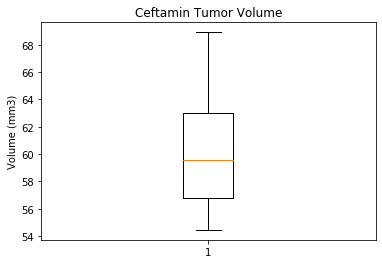

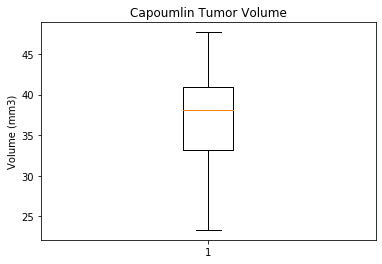

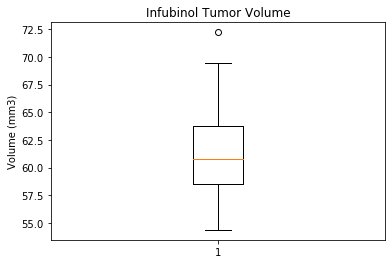

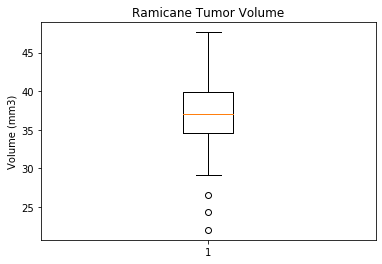

In [9]:
fig1, ax1 = plt.subplots()
ax1.set_title('Ceftamin Tumor Volume')
ax1.set_ylabel("Volume (mm3)")
ax1.boxplot(ceftamin_tumor)
plt.show()

fig2, ax2 = plt.subplots()
ax2.set_title('Capoumlin Tumor Volume')
ax2.set_ylabel("Volume (mm3)")
ax2.boxplot(capomulin_tumor)
plt.show()

fig3, ax3 = plt.subplots()
ax3.set_title('Infubinol Tumor Volume')
ax3.set_ylabel("Volume (mm3)")
ax3.boxplot(infubinol_tumor)
plt.show()

fig4, ax4 = plt.subplots()
ax4.set_title('Ramicane Tumor Volume')
ax4.set_ylabel("Volume (mm3)")
ax4.boxplot(ramicane_tumor)
plt.show()

## Line and scatter plots

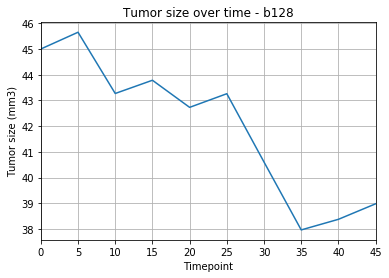

In [10]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

capomulin_b128 = mouse_study.loc[(mouse_study["Drug Regimen"] == "Capomulin") & (mouse_study["Mouse ID"] == "b128")]
volume = capomulin_b128["Tumor Volume (mm3)"]
x_axis = np.arange(0,50,5)

plt.title("Tumor size over time - b128")
plt.xlabel("Timepoint")
plt.ylabel("Tumor size (mm3)")
plt.xlim(0, 45)
plt.grid()
plt.plot(x_axis, volume)


<function matplotlib.pyplot.show(*args, **kw)>

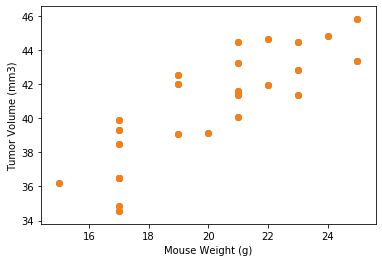

In [11]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

capomulin = mouse_study.loc[mouse_study["Drug Regimen"] == "Capomulin"].groupby(["Mouse ID"]).mean()

x_values= capomulin["Weight (g)"]
y_values= capomulin["Tumor Volume (mm3)"]
plt.scatter(x_values, y_values)

#(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
#regress_values = x_values * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)

#plt.plot(x_values,regress_values,"r-")

#plt.annotate(line_eq,(20,40),fontsize=15,color="red")

plt.xlabel("Mouse Weight (g)")
plt.ylabel("Tumor Volume (mm3)")

#print(f"The r-squared is: {rvalue}")
plt.show

The r-squared is: 0.8419363424694718


<function matplotlib.pyplot.show(*args, **kw)>

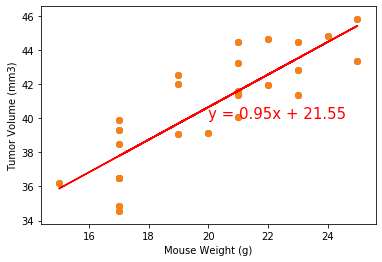

In [12]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

capomulin = mouse_study.loc[mouse_study["Drug Regimen"] == "Capomulin"].groupby(["Mouse ID"]).mean()

x_values= capomulin["Weight (g)"]
y_values= capomulin["Tumor Volume (mm3)"]
plt.scatter(x_values, y_values)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)

plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(20,40),fontsize=15,color="red")

plt.xlabel("Mouse Weight (g)")
plt.ylabel("Tumor Volume (mm3)")

print(f"The r-squared is: {rvalue}")
plt.show